<a href="https://colab.research.google.com/github/daiduong101202/AI--ChieuT6/blob/main/Face_identify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)


In [15]:
trainset='/content/drive/MyDrive/Image_AI'

In [16]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 153 images belonging to 3 classes.
Found 17 images belonging to 3 classes.


In [17]:
{'.ipynb_checkpoints': 0,
 'Phat': 1,
 'Phuc': 2,
 'Quan': 3}

{'.ipynb_checkpoints': 0, 'Phat': 1, 'Phuc': 2, 'Quan': 3}

In [18]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
2/2 [==============================] - 69s 44s/step - loss: 27.1248 - accuracy: 0.3725 - val_loss: 1.3598 - val_accuracy: 0.3529
Epoch 2/50
2/2 [==============================] - 43s 34s/step - loss: 1.2129 - accuracy: 0.2941 - val_loss: 1.1003 - val_accuracy: 0.2941
Epoch 3/50
2/2 [==============================] - 43s 35s/step - loss: 1.0879 - accuracy: 0.3333 - val_loss: 1.0703 - val_accuracy: 0.3529
Epoch 4/50
2/2 [==============================] - 43s 6s/step - loss: 1.0739 - accuracy: 0.3529 - val_loss: 1.0654 - val_accuracy: 0.3529
Epoch 5/50
2/2 [==============================] - 42s 36s/step - loss: 1.1299 - accuracy: 0.3529 - val_loss: 1.0659 - val_accuracy: 0.7059
Epoch 6/50
2/2 [==============================] - 43s 35s/step - loss: 1.0525 - accuracy: 0.4052 - val_loss: 1.0432 - val_accuracy: 0.3529
Epoch 7/50
2/2 [==============================] - 43s 36s/step - loss: 1.0408 - accuracy: 0.3529 - val_loss: 0.9810 - val_accuracy: 0.4706
Epoch 8/50
2/2 [===========

In [20]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 153 images belonging to 3 classes.
Found 17 images belonging to 3 classes.


In [21]:
model.save('monan13.hs')

In [22]:
model1=load_model('monan13.hs')

In [23]:
label = ['Phat', 'Phuc', 'Quan']

1/1 [==============================] - 0s 54ms/step
Phat


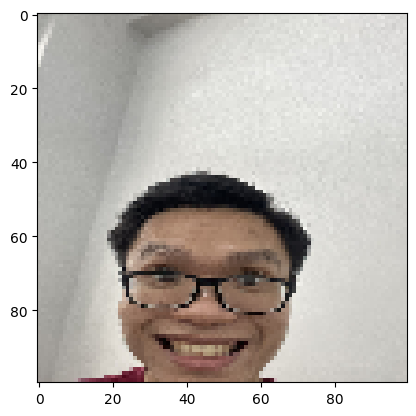

In [25]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/Image_AI/Phat/Phat (12).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 125ms/step
Phuc


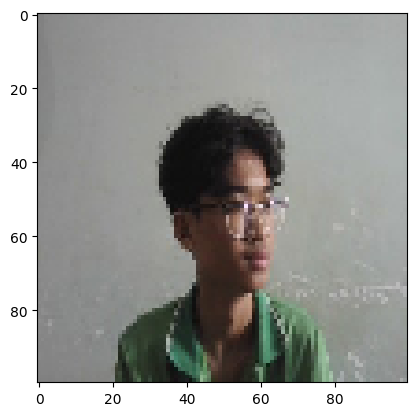

In [26]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/Image_AI/Phuc/Phuc (13).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 89ms/step
Quan


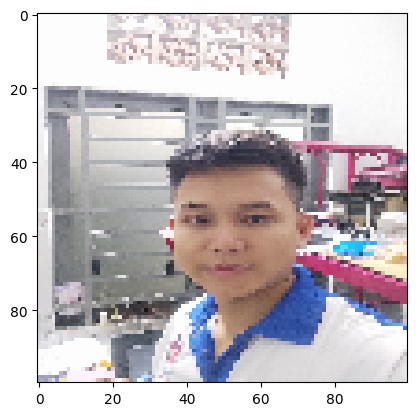

In [27]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/Image_AI/Quan/Quan28.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])